In [1]:
from functions import summarize_results, display_probabilities, plot, calculate_mean, simulate_tosses
import matplotlib.pyplot as plt 

In [2]:
num_tosses = 50

tosses = simulate_tosses(num_tosses)
summarize_results(tosses)

Heads: 29
Tails: 21


In [3]:
display_probabilities(tosses)


Heads: 58.00%
Tails: 42.00%


/Users/zayed/Desktop/learning/coin-toss-simulator/functions.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


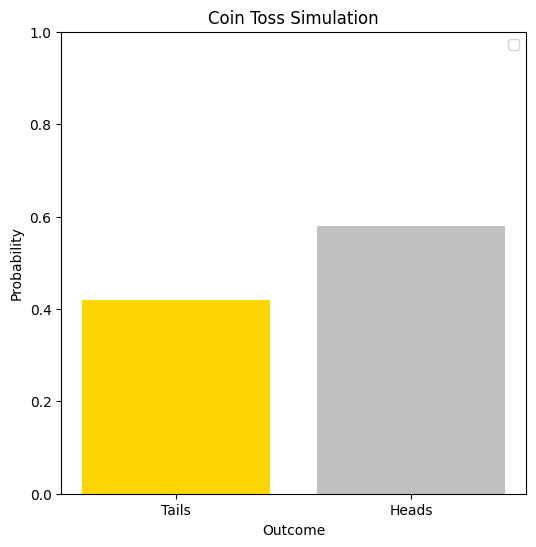

In [4]:
plot(tosses)

In [5]:
mean_value = calculate_mean(tosses)
print("Experimental probability of Heads:", mean_value)

Experimental probability of Heads: 0.58


#### Empirical Probability Distribution

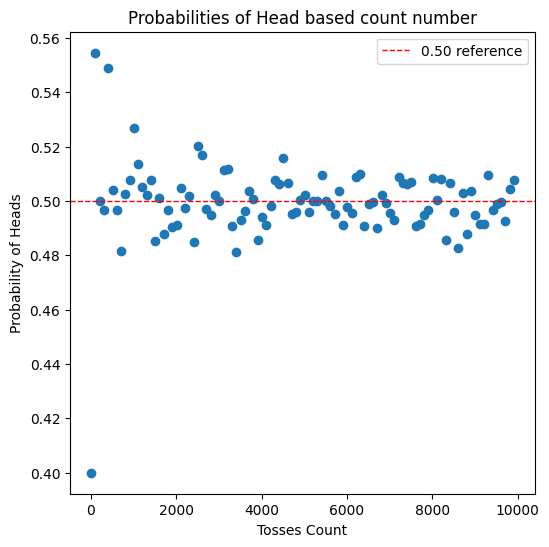

In [6]:
tosses_count = [i for i in range(10,10000,100)]

probablities_of_heads = []
probablities_of_tails = []

for count in tosses_count:
    tosses = simulate_tosses(count)
    total = len(tosses)
    heads = tosses.count('Heads')
    tails = total - heads
    probablities_of_heads.append(heads/total)
    probablities_of_tails.append(tails/total)


plt.figure(figsize=(6,6))
plt.scatter(tosses_count, probablities_of_heads)
plt.axhline(0.5, color='red', linestyle='--', linewidth=1, label='0.50 reference')
plt.title('Probabilities of Head based count number')
plt.xlabel('Tosses Count')
plt.ylabel('Probability of Heads')
plt.legend()
plt.show()

----------------- Experimental VS Binomial Probabilities in 10 Coin Tosses -----------------
k: 0   |   experimental = 0.002   |   theoretical = 0.0009765625
k: 1   |   experimental = 0.012   |   theoretical = 0.009765625
k: 2   |   experimental = 0.044   |   theoretical = 0.0439453125
k: 3   |   experimental = 0.108   |   theoretical = 0.1171875
k: 4   |   experimental = 0.221   |   theoretical = 0.205078125
k: 5   |   experimental = 0.265   |   theoretical = 0.24609375
k: 6   |   experimental = 0.19   |   theoretical = 0.205078125
k: 7   |   experimental = 0.113   |   theoretical = 0.1171875
k: 8   |   experimental = 0.041   |   theoretical = 0.0439453125
k: 9   |   experimental = 0.004   |   theoretical = 0.009765625
k: 10   |   experimental = 0.0   |   theoretical = 0.0009765625


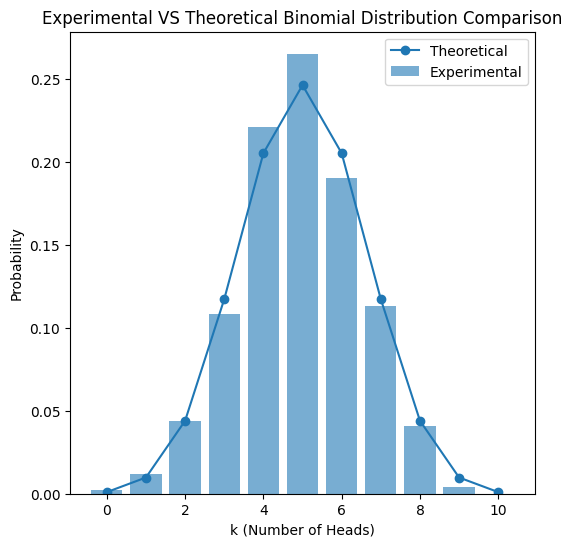

In [13]:
import math
from collections import Counter

def binomial_calc(n, k, p_w,p_l):
    n_choose_k = math.comb(n, k)
    return (n_choose_k) * (p_w ** k) * (p_l ** (n-k))


num_experiments = 1000
n = 10
heads_count = []

for _ in range(num_experiments):
    tosses = simulate_tosses(n)
    num_heads = tosses.count('Heads')
    heads_count.append(num_heads)
    
counts = Counter(heads_count)
binomial_prob = []
experimental_prob = []

for k in range(0, n+1):
    exp_p = counts[k] / num_experiments
    binomial_p = binomial_calc(n, k, 0.5, 0.5)

    experimental_prob.append(exp_p)
    binomial_prob.append(binomial_p)

print("----------------- Experimental VS Binomial Probabilities in 10 Coin Tosses -----------------")
for k in range(n + 1):
    print(f"k: {k}   |   experimental = {experimental_prob[k]}   |   theoretical = {binomial_prob[k]}")

plt.figure(figsize=(6,6))
plt.bar(range(n+1), experimental_prob, alpha=0.6, label="Experimental")
plt.plot(range(n+1), binomial_prob, marker='o', label="Theoretical")
plt.title('Experimental VS Theoretical Binomial Distribution Comparison')
plt.xlabel('k (Number of Heads)')
plt.ylabel('Probability')
plt.legend()
plt.show()




